In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations 

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list. 

coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

603

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | pokhara
Processing Record 3 of Set 1 | dikson
Processing Record 4 of Set 1 | lebu
Processing Record 5 of Set 1 | kodiak
Processing Record 6 of Set 1 | aklavik
Processing Record 7 of Set 1 | ostersund
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | raton
Processing Record 11 of Set 1 | bluff
Processing Record 12 of Set 1 | urengoy
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 15 of Set 1 | caravelas
Processing Record 16 of Set 1 | butaritari
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | kuche
City not found. Skipping...
Processing Record 20 of Set 1 | namibe
Processing Record 21 of Set 1 | arraial do cabo
Processing Record 22 of Set 1 | saint-pier

Processing Record 37 of Set 4 | port hardy
Processing Record 38 of Set 4 | port macquarie
Processing Record 39 of Set 4 | kitui
Processing Record 40 of Set 4 | kivioli
Processing Record 41 of Set 4 | sterling
Processing Record 42 of Set 4 | mezen
Processing Record 43 of Set 4 | belyy yar
Processing Record 44 of Set 4 | saint anthony
Processing Record 45 of Set 4 | copperas cove
Processing Record 46 of Set 4 | tilichiki
Processing Record 47 of Set 4 | nicolas bravo
Processing Record 48 of Set 4 | san jeronimo
Processing Record 49 of Set 4 | yauya
Processing Record 50 of Set 4 | lompoc
Processing Record 1 of Set 5 | thunder bay
Processing Record 2 of Set 5 | sharjah
Processing Record 3 of Set 5 | marfino
Processing Record 4 of Set 5 | salalah
Processing Record 5 of Set 5 | montepuez
Processing Record 6 of Set 5 | kapaa
Processing Record 7 of Set 5 | saleaula
City not found. Skipping...
Processing Record 8 of Set 5 | charters towers
Processing Record 9 of Set 5 | calama
Processing Record 

Processing Record 23 of Set 8 | yar-sale
Processing Record 24 of Set 8 | burnie
Processing Record 25 of Set 8 | coahuayana
Processing Record 26 of Set 8 | rocha
Processing Record 27 of Set 8 | champerico
Processing Record 28 of Set 8 | san juan
Processing Record 29 of Set 8 | solsvik
City not found. Skipping...
Processing Record 30 of Set 8 | deputatskiy
Processing Record 31 of Set 8 | dali
Processing Record 32 of Set 8 | vila velha
Processing Record 33 of Set 8 | moerai
Processing Record 34 of Set 8 | carmo do rio claro
Processing Record 35 of Set 8 | karkaralinsk
City not found. Skipping...
Processing Record 36 of Set 8 | emmett
Processing Record 37 of Set 8 | iqaluit
Processing Record 38 of Set 8 | takoradi
Processing Record 39 of Set 8 | rosarito
Processing Record 40 of Set 8 | uyuni
Processing Record 41 of Set 8 | sao francisco de assis
Processing Record 42 of Set 8 | abha
Processing Record 43 of Set 8 | dongli
Processing Record 44 of Set 8 | ulladulla
Processing Record 45 of Set 

Processing Record 11 of Set 12 | cap malheureux
Processing Record 12 of Set 12 | miranda
Processing Record 13 of Set 12 | manado
Processing Record 14 of Set 12 | komsomolskiy
Processing Record 15 of Set 12 | cobija
Processing Record 16 of Set 12 | hohhot
Processing Record 17 of Set 12 | tuy hoa
Processing Record 18 of Set 12 | spencer
Processing Record 19 of Set 12 | kabinda
Processing Record 20 of Set 12 | tromso
Processing Record 21 of Set 12 | goundam
Processing Record 22 of Set 12 | havre
Processing Record 23 of Set 12 | omsukchan
Processing Record 24 of Set 12 | alindao
Processing Record 25 of Set 12 | union city
Processing Record 26 of Set 12 | dunmore town
Processing Record 27 of Set 12 | khryashchevka
Processing Record 28 of Set 12 | pudozh
Processing Record 29 of Set 12 | honiara
Processing Record 30 of Set 12 | les cayes
Processing Record 31 of Set 12 | westport
Processing Record 32 of Set 12 | chernyshevskiy
Processing Record 33 of Set 12 | obo
Processing Record 34 of Set 12

In [21]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,46.47,98,100,7.45,NZ,2022-04-21 18:22:00
1,Pokhara,28.2333,83.9833,67.95,75,85,4.41,NP,2022-04-21 18:22:01
2,Dikson,73.5069,80.5464,0.01,99,98,11.12,RU,2022-04-21 18:22:01
3,Lebu,-37.6167,-73.6500,54.23,98,100,17.60,CL,2022-04-21 18:22:02
4,Kodiak,57.7900,-152.4072,38.71,75,75,13.80,US,2022-04-21 18:22:02
5,Aklavik,68.2191,-135.0107,3.20,85,100,0.00,CA,2022-04-21 18:22:02
6,Ostersund,63.1792,14.6357,55.85,35,0,8.05,SE,2022-04-21 18:22:03
7,Bethel,41.3712,-73.4140,60.19,44,0,16.11,US,2022-04-21 18:22:03
8,Albany,42.6001,-73.9662,58.03,44,98,1.99,US,2022-04-21 18:20:52
9,Raton,36.9034,-104.4391,76.05,18,0,16.11,US,2022-04-21 18:18:43


In [22]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2022-04-21 18:22:00,-46.1927,168.8643,46.47,98,100,7.45
1,Pokhara,NP,2022-04-21 18:22:01,28.2333,83.9833,67.95,75,85,4.41
2,Dikson,RU,2022-04-21 18:22:01,73.5069,80.5464,0.01,99,98,11.12
3,Lebu,CL,2022-04-21 18:22:02,-37.6167,-73.6500,54.23,98,100,17.60
4,Kodiak,US,2022-04-21 18:22:02,57.7900,-152.4072,38.71,75,75,13.80
5,Aklavik,CA,2022-04-21 18:22:02,68.2191,-135.0107,3.20,85,100,0.00
6,Ostersund,SE,2022-04-21 18:22:03,63.1792,14.6357,55.85,35,0,8.05
7,Bethel,US,2022-04-21 18:22:03,41.3712,-73.4140,60.19,44,0,16.11
8,Albany,US,2022-04-21 18:20:52,42.6001,-73.9662,58.03,44,98,1.99
9,Raton,US,2022-04-21 18:18:43,36.9034,-104.4391,76.05,18,0,16.11


In [24]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

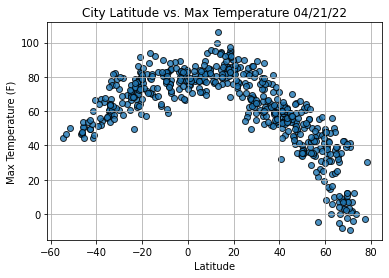

In [26]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

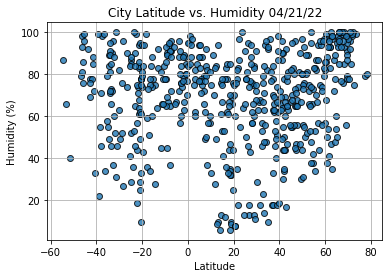

In [27]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

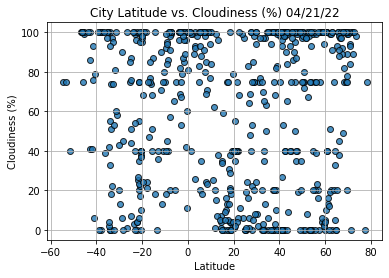

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

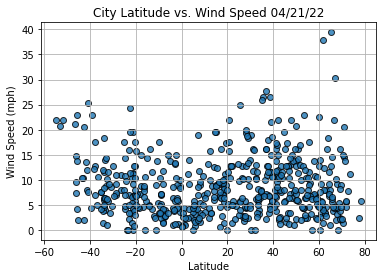

In [29]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [31]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [33]:
index13 = city_data_df.loc[13]
index13

City                    Caravelas
Country                        BR
Date          2022-04-21 18:22:05
Lat                      -17.7125
Lng                      -39.2481
Max Temp                    81.61
Humidity                       59
Cloudiness                     24
Wind Speed                   8.84
Name: 13, dtype: object

In [34]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Pokhara,NP,2022-04-21 18:22:01,28.2333,83.9833,67.95,75,85,4.41
2,Dikson,RU,2022-04-21 18:22:01,73.5069,80.5464,0.01,99,98,11.12
4,Kodiak,US,2022-04-21 18:22:02,57.7900,-152.4072,38.71,75,75,13.80
5,Aklavik,CA,2022-04-21 18:22:02,68.2191,-135.0107,3.20,85,100,0.00
6,Ostersund,SE,2022-04-21 18:22:03,63.1792,14.6357,55.85,35,0,8.05


In [35]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

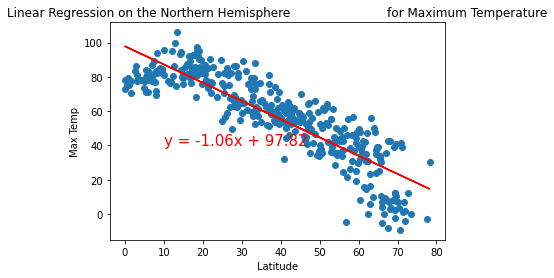

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

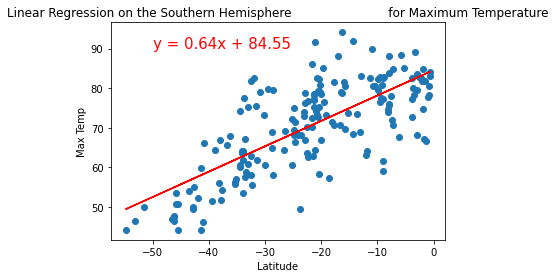

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

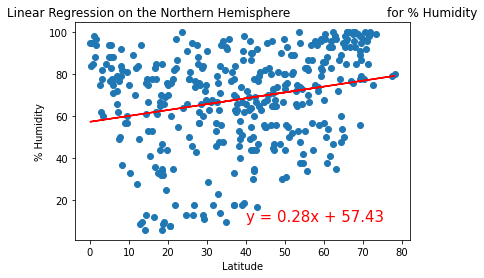

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

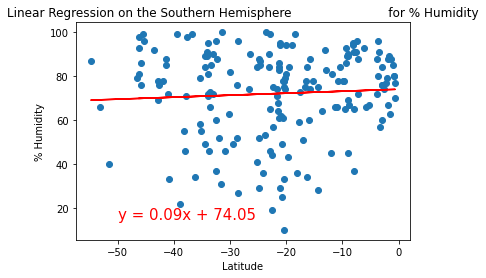

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

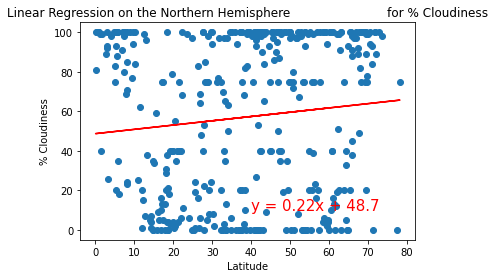

In [45]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

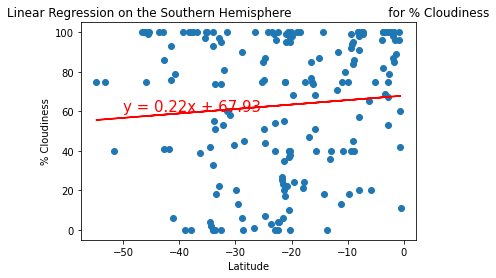

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

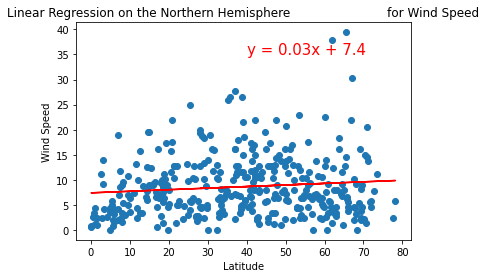

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

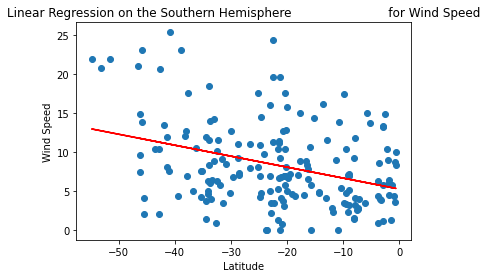

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))